In [64]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = quandl.get('WIKI/GOOGL', start_date='2012-01-01', end_date='2012-01-8' )

df


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,652.94,668.15,652.37,665.41,7345600.0,0.0,1.0,327.480902,335.109451,327.195020,333.735209,7345600.0
2012-01-04,665.03,670.25,660.62,668.28,5722200.0,0.0,1.0,333.544620,336.162702,331.332793,335.174652,5722200.0
2012-01-05,662.13,663.97,656.23,659.01,6559200.0,0.0,1.0,332.090130,333.012979,329.130996,330.525300,6559200.0
2012-01-06,659.15,660.00,649.79,650.02,5380400.0,0.0,1.0,330.595517,331.021833,325.901025,326.016381,5380400.0


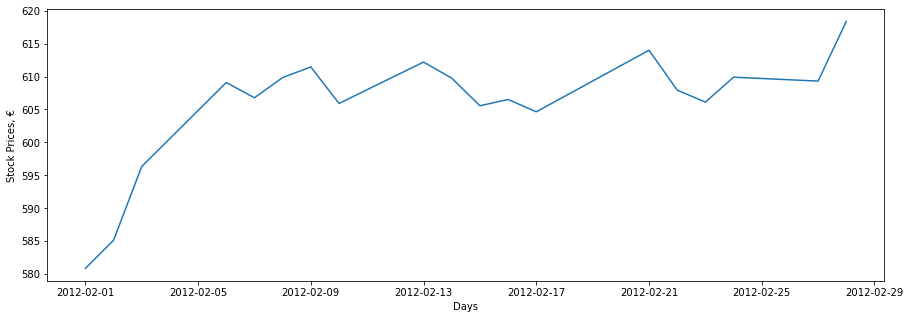

In [69]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stock_name = 'WIKI/GOOGL' 

# Plot of E.ON(a big scale energy company in Europe) 
#stock prices since beginning of 2019 (up to July)
prices = quandl.get(stock_name, 
                authtoken="-Rx2x2FtTpfTSG1qB-MJ", 
                start_date = '2012-02-01', end_date = '2012-02-28').reset_index(drop = False)[['Date', 'Close']]
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()



In [66]:
prices

,Date,Close
0,2012-01-03,665.41
1,2012-01-04,668.28
2,2012-01-05,659.01
3,2012-01-06,650.02
4,2012-01-09,622.46
5,2012-01-10,623.14
6,2012-01-11,625.96
7,2012-01-12,629.64
8,2012-01-13,624.99
9,2012-01-17,628.58


        Date   Close
0 2012-01-03  665.41
1 2012-01-04  668.28
2 2012-01-05  659.01
3 2012-01-06  650.02
4 2012-01-09  622.46
         Date   Close
15 2012-01-25  569.49
16 2012-01-26  568.10
17 2012-01-27  579.98
18 2012-01-30  577.69
19 2012-01-31  580.11
[0.004313130250522241, -0.013871431136649282, -0.013641674633161878, -0.04239869542475608, 0.0010924396748384635, 0.004525467792149517, 0.005878969902230094, -0.007385172479512066, 0.005744091905470539, 0.0068885424289667615, 0.01052282315021106, -0.08377503635254943, -0.000802061468625791, -0.007839185681104031, -0.019692561926565922, -0.0024407803473282873, 0.02091181130082731, -0.003948412014207324, 0.004189097959112948]
[-0.00718382 -0.01436764 -0.02155147 -0.02873529 -0.03591911 -0.04310293
 -0.05028676 -0.05747058 -0.0646544  -0.07183822 -0.07902205 -0.08620587
 -0.09338969 -0.10057351 -0.10775734 -0.11494116 -0.12212498 -0.1293088
 -0.13649263 -0.14367645]
{'1': array([ 0.012717  ,  0.03799049,  0.01509315,  0.02791186,  0.01

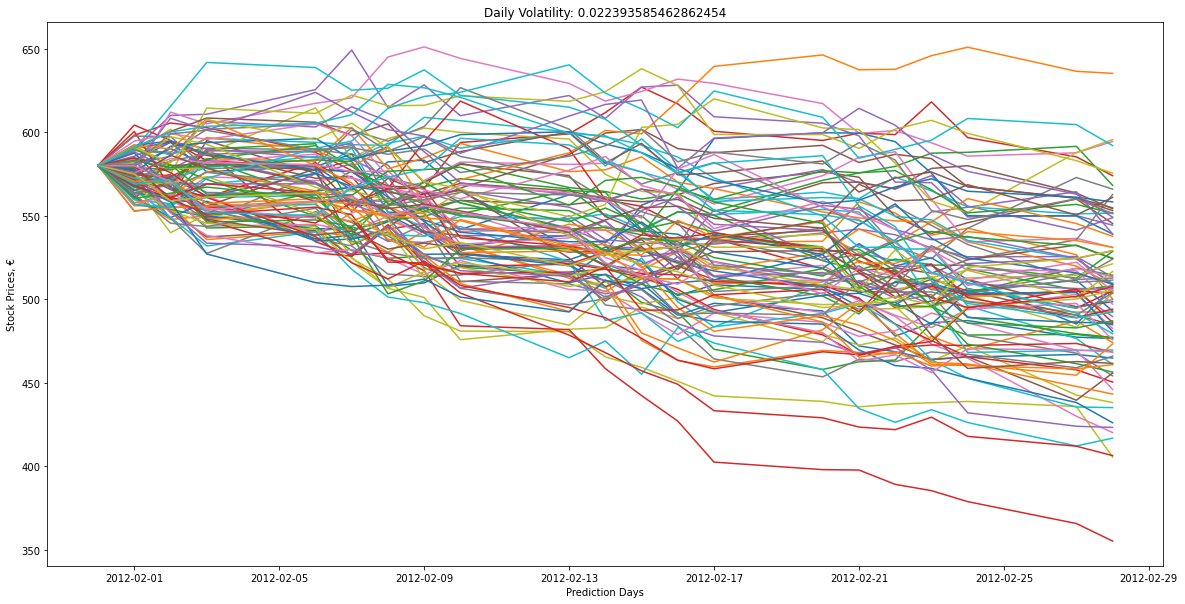

In [70]:
#--------------------------------------------------- GEOMETRIC BROWNIAN MOTION ------------------------------------------------

# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

start_date = '2012-01-01'
end_date = '2012-01-31'
pred_end_date = '2012-02-28'

# We get daily closing stock prices of E.ON for July 2019
S_eon = quandl.get(stock_name, 
               authtoken="-Rx2x2FtTpfTSG1qB-MJ", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]
print(S_eon.head())
print(S_eon.tail())

returns = (S_eon.loc[1:, 'Close'] - \
           S_eon.shift(1).loc[1:, 'Close']) / \
           S_eon.shift(1).loc[1:, 'Close']
print(returns.tolist())

# Parameter Assignments
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)

scen_size = 100 # User input

b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S)

# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show()

# Dataframe format for predictions - first 10 scenarios only
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :10]).set_index(
           pd.date_range(start = S_eon["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False)
  